<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/Gmm%E7%9A%84%E4%B8%8D%E5%90%8C%E5%8F%82%E6%95%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import itertools
from scipy import linalg
import matplotlib as mpl
import matplotlib.colors
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture
%matplotlib inline

In [4]:
def expand(a, b, rate=0.05):
    d = (b - a) * rate
    return a-d, b+d

In [5]:
n_samples = 500

np.random.seed(28)
C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C), .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]
X.shape

(1000, 2)

In [6]:
## 不同参数效果比较
lowest_bic = np.infty

bics = []
n_components_range = range(1, 7)

cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components, covariance_type=cv_type)
        gmm.fit(X)
        # 聚合的结果非常好，但是参数即方差很大，这是不合理的
        # bic越小越好？
        bics.append(gmm.bic(X))  ##Bayesian information criterion (BIC)
        if bics[-1] < lowest_bic:
            lowest_bic = bics[-1]  
            best_gmm = gmm

# 获取相关参数以及最优算法
clf = best_gmm
Y_ = clf.predict(X)

print ("均值:\n", clf.means_)
print ("方差:\n", clf.covariances_)


均值:
 [[-0.03908874 -0.00864228]
 [-5.96170456  3.0078179 ]]
方差:
 [[[2.59795894 0.61525644]
  [0.61525644 0.156022  ]]

 [[0.52760145 0.02227373]
  [0.02227373 0.49288209]]]


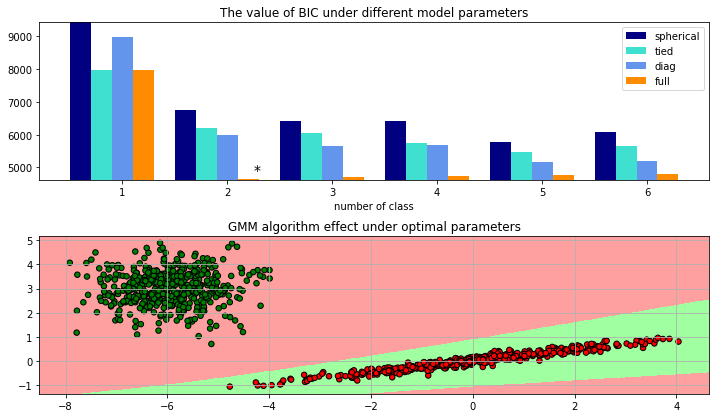

In [9]:
# 画图
bics = np.array(bics)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue', 'darkorange'])
fig = plt.figure(figsize=(12, 6), facecolor='w')
## 画出效果比较
spl = plt.subplot(2, 1, 1)
bars = []
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bics[i * len(n_components_range):(i + 1) * len(n_components_range)], width=.2, color=color))

plt.xticks(n_components_range)
plt.ylim([bics.min() * 1.01 - .01 * bics.max(), bics.max()])
plt.title(u'The value of BIC under different model parameters')
xpos = np.mod(bics.argmin(), len(n_components_range)) + .65 + .2 * np.floor(bics.argmin() / len(n_components_range))
plt.text(xpos, bics.min() * 0.97 + .03 * bics.max(), '*', fontsize=14)
spl.set_xlabel(u'number of class')
spl.legend([b[0] for b in bars], cv_types)

# 画出分类效果图（可以看到最优分类是2）
splot = plt.subplot(2, 1, 2)
cm_light = mpl.colors.ListedColormap(['#FFA0A0', '#A0FFA0'])
cm_dark = mpl.colors.ListedColormap(['r', 'g'])

x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
x1_min, x1_max = expand(x1_min, x1_max)
x2_min, x2_max = expand(x2_min, x2_max)
x1, x2 = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j]
grid_test = np.stack((x1.flat, x2.flat), axis=1)
grid_hat = clf.predict(grid_test)
grid_hat = grid_hat.reshape(x1.shape)
if clf.means_[0][0] > clf.means_[1][0]:
    z = grid_hat == 0
    grid_hat[z] = 1
    grid_hat[~z] = 0

plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y_, marker='o', cmap=cm_dark, edgecolors='k')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title(u'GMM algorithm effect under optimal parameters')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.grid()

plt.show()
